# Resnet 18 Finetuned in Rtx 4080 16GB, max iter 80000 , LR Schedule, AMP(bfloat16) + torch.compile(), Imagenet100 dataset 

In [ ]:
import sys
sys.path.insert(0, '..')
from finetune.resnet18 import setup_resnet18
import torch

# Load the model architecture
model = setup_resnet18(num_classes=100, pretrained=False)

# Load the checkpoint
checkpoint_path = "/home/samitha/Projects/miniVGG/log_resnet18/model_79999.pt"  
checkpoint = torch.load(checkpoint_path)
model.load_state_dict(checkpoint['model'])

# Count parameters
params = sum([p.numel() for p in model.parameters()])
print(f"Parameters: {params / 10**6:.1f}M")

/home/samitha/miniconda3/envs/torch/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/samitha/miniconda3/envs/torch/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/tmp/ipykernel_124894/1484407945.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_onl

Original final layer: Linear(in_features=512, out_features=1000, bias=True)
Modified final layer: Linear(in_features=512, out_features=100, bias=True)
Total parameters: 11,227,812
Trainable parameters: 11,227,812
Parameters: 11.2M


Min Train Loss: 0.245561
Min Validation Loss: 0.7141


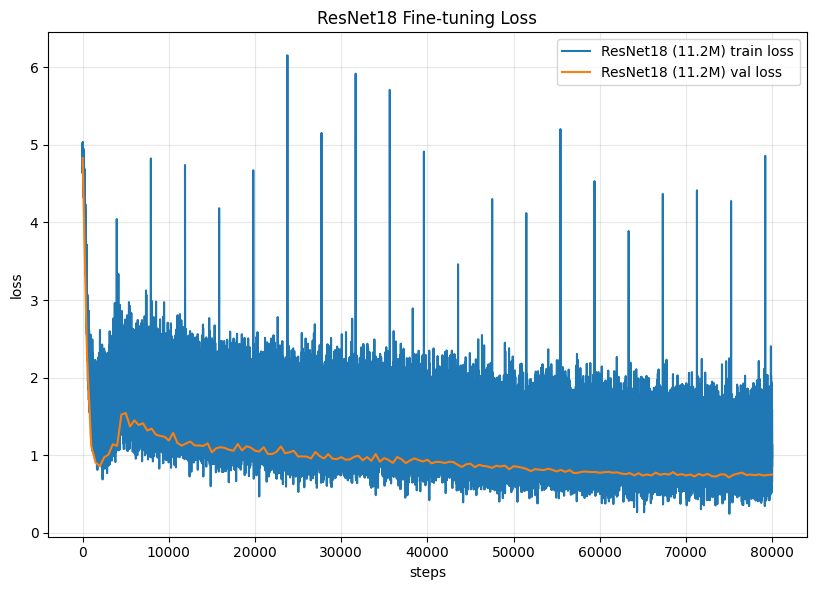

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sz = "11.2M"  # ResNet18 parameter count

# Read the log file
with open("/home/samitha/Projects/miniVGG/log_resnet18/log.txt", "r") as f:
    lines = f.readlines()

streams = {}
for line in lines:
    step, stream, val = line.strip().split()
    if stream not in streams:
        streams[stream] = {}
    streams[stream][int(step)] = float(val)

streams_xy = {}
for k, v in streams.items():
    xy = sorted(list(v.items()))
    streams_xy[k] = list(zip(*xy))

plt.figure(figsize=(16, 6))

# losses: both train and val
plt.subplot(121)
xs, ys = streams_xy["train"]  # training loss
ys = np.array(ys)
plt.plot(xs, ys, label=f'ResNet18 ({sz}) train loss')
print("Min Train Loss:", min(ys))

xs, ys = streams_xy["val"]  # validation loss
plt.plot(xs, ys, label=f'ResNet18 ({sz}) val loss')
print("Min Validation Loss:", min(ys))

plt.xlabel("steps")
plt.ylabel("loss")
plt.legend()
plt.title("ResNet18 Fine-tuning Loss")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Efficientnet b0 Finetuned in Rtx 4080 16GB, max iter 80000 , LR Schedule, AMP(bfloat16) + torch.compile(), Imagenet100 dataset 

In [6]:
import sys
sys.path.insert(0, '..')
from finetune.efficientnet_b0 import setup_efficientnet_b0
import torch

# Load the model architecture
model = setup_efficientnet_b0(num_classes=100, pretrained=False)

# Load the checkpoint
checkpoint_path = "/home/samitha/Projects/miniVGG/log_effnetb0/model_79999.pt"  
checkpoint = torch.load(checkpoint_path)
model.load_state_dict(checkpoint['model'])

# Count parameters
params = sum([p.numel() for p in model.parameters()])
print(f"Parameters: {params / 10**6:.1f}M")

/home/samitha/miniconda3/envs/torch/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/samitha/miniconda3/envs/torch/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/tmp/ipykernel_124894/3918851399.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_onl

Original classifier: Sequential(Dropout(p=0.2, inplace=True), Linear(in_features=1280, out_features=1000, bias=True))
Modified classifier: Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=100, bias=True)
)
Total parameters: 4,135,648
Trainable parameters: 4,135,648
Parameters: 4.1M


Min Train Loss: 0.221142
Min Validation Loss: 0.4756


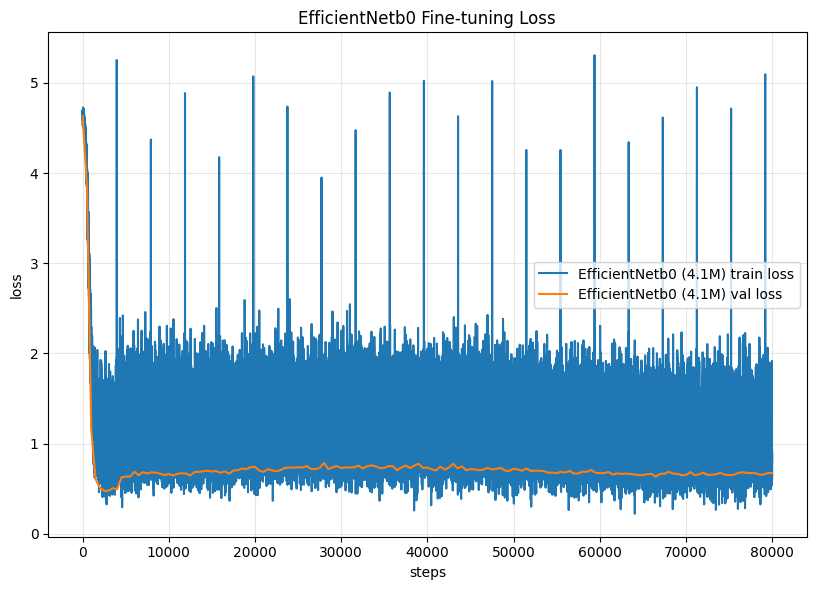

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sz = "4.1M"  # EffNetb0 parameter count

# Read the log file
with open("/home/samitha/Projects/miniVGG/log_effnetb0/log.txt", "r") as f:
    lines = f.readlines()

streams = {}
for line in lines:
    step, stream, val = line.strip().split()
    if stream not in streams:
        streams[stream] = {}
    streams[stream][int(step)] = float(val)

streams_xy = {}
for k, v in streams.items():
    xy = sorted(list(v.items()))
    streams_xy[k] = list(zip(*xy))

plt.figure(figsize=(16, 6))

# losses: both train and val
plt.subplot(121)
xs, ys = streams_xy["train"]  # training loss
ys = np.array(ys)
plt.plot(xs, ys, label=f'EfficientNetb0 ({sz}) train loss')
print("Min Train Loss:", min(ys))

xs, ys = streams_xy["val"]  # validation loss
plt.plot(xs, ys, label=f'EfficientNetb0 ({sz}) val loss')
print("Min Validation Loss:", min(ys))

plt.xlabel("steps")
plt.ylabel("loss")
plt.legend()
plt.title("EfficientNetb0 Fine-tuning Loss")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()